# Problem Statement

### In this task we will be predicting the percentage of a student based on the no. of hours of study.

In [21]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# stats model
import statsmodels.api as sm

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plots the data points to see if there is some relationship between Hours and Scores.

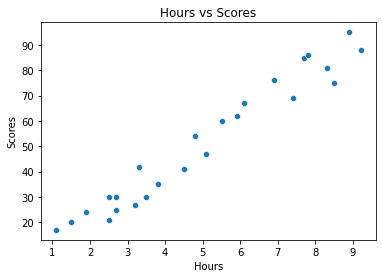

In [9]:
sns.scatterplot(data['Hours'],data['Scores'])
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

From the above plot we can see that there is linear positive relationship between Hours and Scores.

### Preparing the Data

In [17]:
## Dividing the data into Features and Target variable

X = pd.DataFrame(data['Hours'])
y = data['Scores']

In [18]:
## Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [19]:
## Checking the shapes of train and test data

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


### Training the Algorithm

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

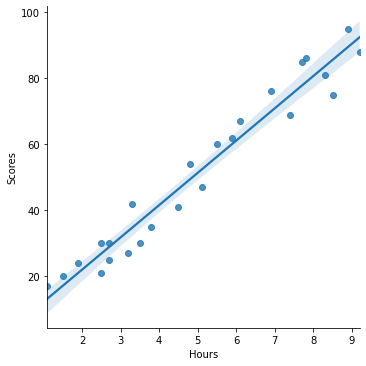

In [25]:
## Plotting the Regression Line

sns.lmplot(x = 'Hours', y = 'Scores', data=data)
plt.show()

### Making Prediction

In [26]:
y_pred = lr.predict(X_test)

In [27]:
## Comparing Actual vs Predicted

df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [37]:
## Now we will test with our own data

hours = np.array(9.25).reshape(-1,1)
pred = lr.predict(hours)
pred

array([93.69173249])

In [42]:
print("No of Hours: ", hours[0])
print("Predicted Score: ",pred[0])

No of Hours:  [9.25]
Predicted Score:  93.69173248737538


### Evaluation

In [44]:
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 4.6474476121003665


In [45]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  4.183859899002975
